In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
import time
import seaborn as sn
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
import tsfresh

In [33]:
path = "/Users/sdonzis/Desktop/Project_Data_GCC/Data/"
os.chdir(path)
df_data = pd.read_csv("alldata.csv", header=0)
df_data = df_data.dropna()
seed = 42

In [34]:
df_data.head()

,Niveau,Fréquences 1,Fréquences 2,Amortissement 1,Amortissement 2,Exploitable,Temps,Vitesse,Fréquences,FRF réel,FRF imag,X Fourier,Y Fourier
0,0.0,1787.0,1887.0,2.999,0.685,1.0,"[0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...","[-0.009452226, -0.00673604, -0.00773401, -0.00...","[0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...","[-0.0, -2.302514e-05, -5.967823e-05, 0.0002342...","[0.0, -2.668274e-05, -0.0002514399, 0.00014453...",[ 0. 32.5732899 65.1465798 9...,[ 6.05676303 0.06357554 0.23308392 0.165487...
1,0.0,1703.0,1854.0,1.116,0.692,1.0,"[0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...","[-0.009723845, -0.01022985, -0.009524251, -0.0...","[0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...","[-0.0, 3.561831e-05, 7.394589e-05, -0.00116518...","[0.0, -2.237394e-05, -0.0002670759, 0.00040503...",[ 0. 32.5732899 65.1465798 9...,[ 6.02032216 0.09808489 0.32311089 0.958851...
2,1.0,1536.0,1753.0,1.270,0.666,1.0,"[0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...","[-0.005207651, -0.004080281, -0.003525446, -0....","[0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...","[-0.0, 0.0003261978, 0.001021632, 0.001841591,...","[0.0, 6.054156e-05, -0.001706973, 0.0150348, -...",[ 0. 32.5732899 65.1465798 9...,[5.68165649e+00 3.75751267e-01 1.12653682e+00 ...
3,0.0,1720.0,1870.0,0.399,0.744,1.0,"[0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...","[-0.009192205, -0.007869514, -0.005686188, -0....","[0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...","[-0.0, -0.000162651, 0.0005646234, 0.002073547...","[0.0, 2.962237e-05, 0.0004077999, 9.425909e-05...",[ 0. 32.5732899 65.1465798 9...,[6.03505023 0.11937534 0.2514536 0.49958924 0...
4,0.0,1737.0,1937.0,1.434,1.875,1.0,"[0.0, 0.09765625, 0.1953125, 0.2929688, 0.3906...","[-0.009271554, -0.005567775, -0.007788333, -0....","[0.0, 16.70473, 33.40946, 50.11419, 66.81892, ...","[-0.0, -0.0004254416, 0.0007007722, -0.0006456...","[0.0, 0.0003771491, -9.416138e-05, 0.000957456...",[ 0. 32.5732899 65.1465798 9...,[6.18366969 0.39076804 0.24298959 0.26456862 0...


In [35]:
# list_vitesse = pd.Series(df_data['Vitesse'], dtype="float").to_numpy
# np.array(df_data[df_data.columns[1:5]])[:5]

In [133]:
# preprocessing data
# pandas with strings to numpy array
list_vitesse = []
for i in df_data['Vitesse']:
    list_vitesse.append(eval(i))

list_frf_reel = []
for i in df_data['FRF réel']:
    list_frf_reel.append(eval(i))

list_frf_imag = []
for i in df_data['FRF imag']:
    list_frf_imag.append(eval(i))

np_features = np.array(df_data[df_data.columns[1:5]])    
np_vitesse = np.array(list_vitesse)
np_frf_reel = np.array(list_frf_reel)
np_frf_imag = np.array(list_frf_imag)
np_frf = np.sqrt(np.square(np_frf_reel) + np.square(np_frf_imag))

np_class_categorical = df_data['Niveau'].values
# np_class = pd.get_dummies(np_class_categorical).values

# np_data = np.concatenate((np_features, np_vitesse, np_frf, np_class), axis=1)

In [ ]:
np_features=[]
for i in range(np_vitesse.shape[0]):
        a=[]
        for j in range(np_vitesse.shape[1]):
                a.append(([np_vitesse[i,j], np_frf[i,j]]))
        np_features.append(np.array(a))
np_features=np.array(np_features)

In [346]:
df_data.groupby(["Niveau"])["Exploitable"].value_counts()/df_data.groupby(["Niveau"])["Exploitable"].count()*100

Niveau  Exploitable
0.0     1.0            97.020393
        0.0             2.979607
1.0     1.0            96.231911
        0.0             3.768089
2.0     1.0            89.362583
        0.0            10.637417
3.0     0.0            70.273973
        1.0            29.726027
4.0     0.0            92.265193
        1.0             7.734807
Name: Exploitable, dtype: float64

In [ ]:
# clustering using kmeans and Dynamic Time Warping-DTW
# we are going to analise the performance of the clusterization for univariate time series feature and multivariate in a further approach. 

# model_speed = []
# cluster_labels = []
# for i in np.arange(2,5,9):
#     model_speed.append(TimeSeriesKMeans(n_clusters=i, 
#                                         metric="dtw", 
#                                         max_iter=10))
#     cluster_labels.append(model_speed[i-2].fit_predict(np_features))

## multivariate features
## preprocessing data - scaling
# X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

In [ ]:
# based only on speed data
model_speed_01 = TimeSeriesKMeans(n_clusters=3, 
                                  metric="dtw", 
                                  max_iter=10)
cluster_labels_01 = model_speed_01.fit_predict(np_vitesse[:1000])

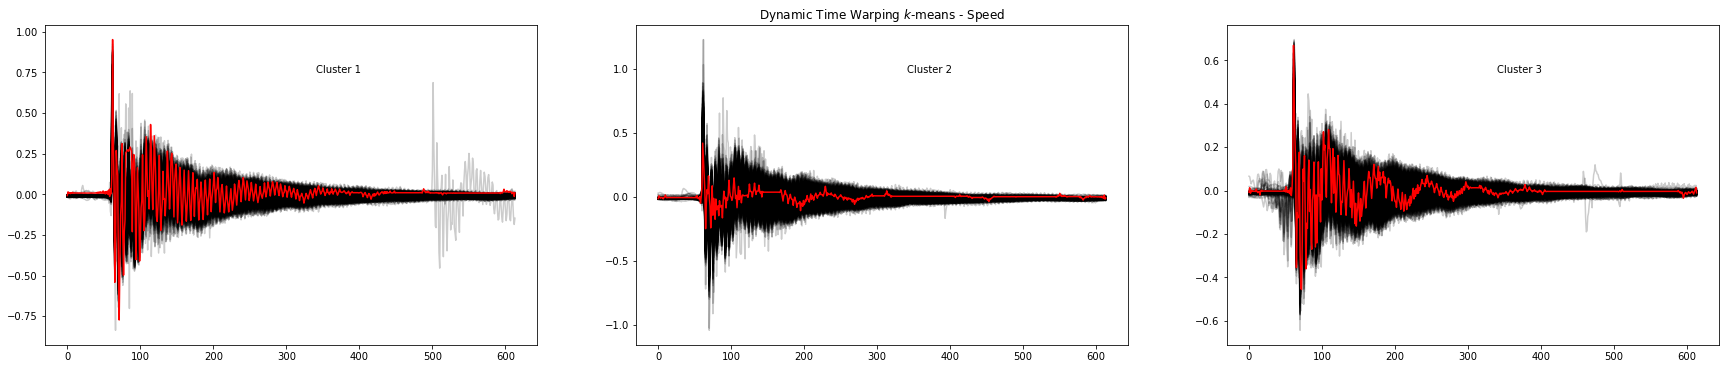

In [41]:
nb_clusters = 3
plt.figure(figsize=(30,20))
for yi in range(nb_clusters):
    plt.subplot(3, 3, yi + 1)
    for xx in np_vitesse[:1000][cluster_labels_01 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_speed_01.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Dynamic Time Warping $k$-means - Speed")

In [286]:
print(np. unique((cluster_labels_01), return_counts=True))

(array([0, 1, 2]), array([321, 299, 380]))


In [134]:
rnd_indices = np.arange(len(np_vitesse))
np.random.shuffle(rnd_indices)
print(len(rnd_indices))
Xtrain = np_vitesse[rnd_indices]
Xtrain = Xtrain[:200]

22520


In [281]:
# based only on speed data DTW
Xtrain = np_vitesse[rnd_indices]
Xtrain = Xtrain[:200]
model_speed_02 = TimeSeriesKMeans(n_clusters=9, 
                                  metric="dtw", 
                                  max_iter=10)
cluster_labels_02 = model_speed_02.fit_predict(Xtrain)

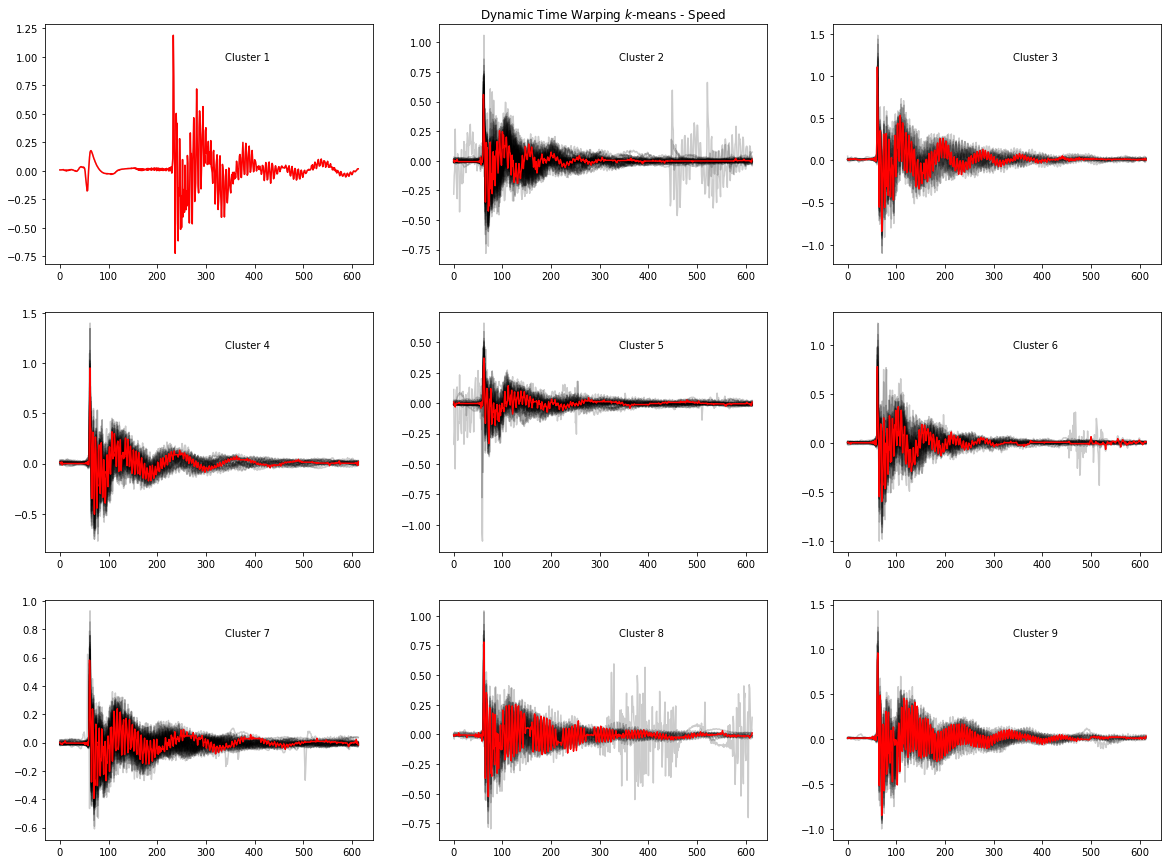

In [282]:
nb_clusters = 9
plt.figure(figsize=(20,15))
for yi in range(nb_clusters):
    plt.subplot(3, 3, yi + 1)
    for xx in Xtrain[cluster_labels_02 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_speed_02.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Dynamic Time Warping $k$-means - Speed")

In [293]:
cluster_labels_022 = model_speed_02.predict(np_vitesse)
print(np. unique((cluster_labels_022), return_counts=True))
print(len(cluster_labels_022))

/Users/sdonzis/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 22520 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([ 1, 44, 14, 23, 34, 22, 38, 13, 11]))
200


In [337]:
def plot_cluster_counts(cluster_labels):
    value_counts = np. unique((cluster_labels), return_counts=True)
    plt.bar(value_counts[0], value_counts[1]/np.sum(value_counts[1])*100)
    plt.xlabel("Clusters")
    plt.ylabel("Counts as percentage of total samples [%]")
    plt.title("Number of samples in each cluster - DTW k-means")

Inexplotable Data:  23.94 %


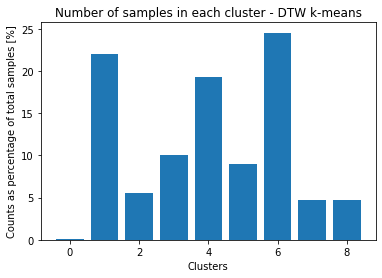

In [339]:
plot_cluster_counts(cluster_labels_022)
value_counts = np. unique((cluster_labels_022), return_counts=True)
print("Inexplotable Data: ", "{:.2f}".format(np.sum(np.array(value_counts[1]/np.sum(value_counts[1])*100)[[4,7]])), "%")

Based only on speed data DTW - 9 clusters

In [62]:
# based only on speed data DTW
Xtrain = np_vitesse[rnd_indices]
Xtrain = Xtrain[:200]
model_speed_9_200 = TimeSeriesKMeans(n_clusters=9, 
                                    metric="dtw", 
                                    max_iter=10)
cluster_labels_9_200 = model_speed_9_200.fit_predict(Xtrain)

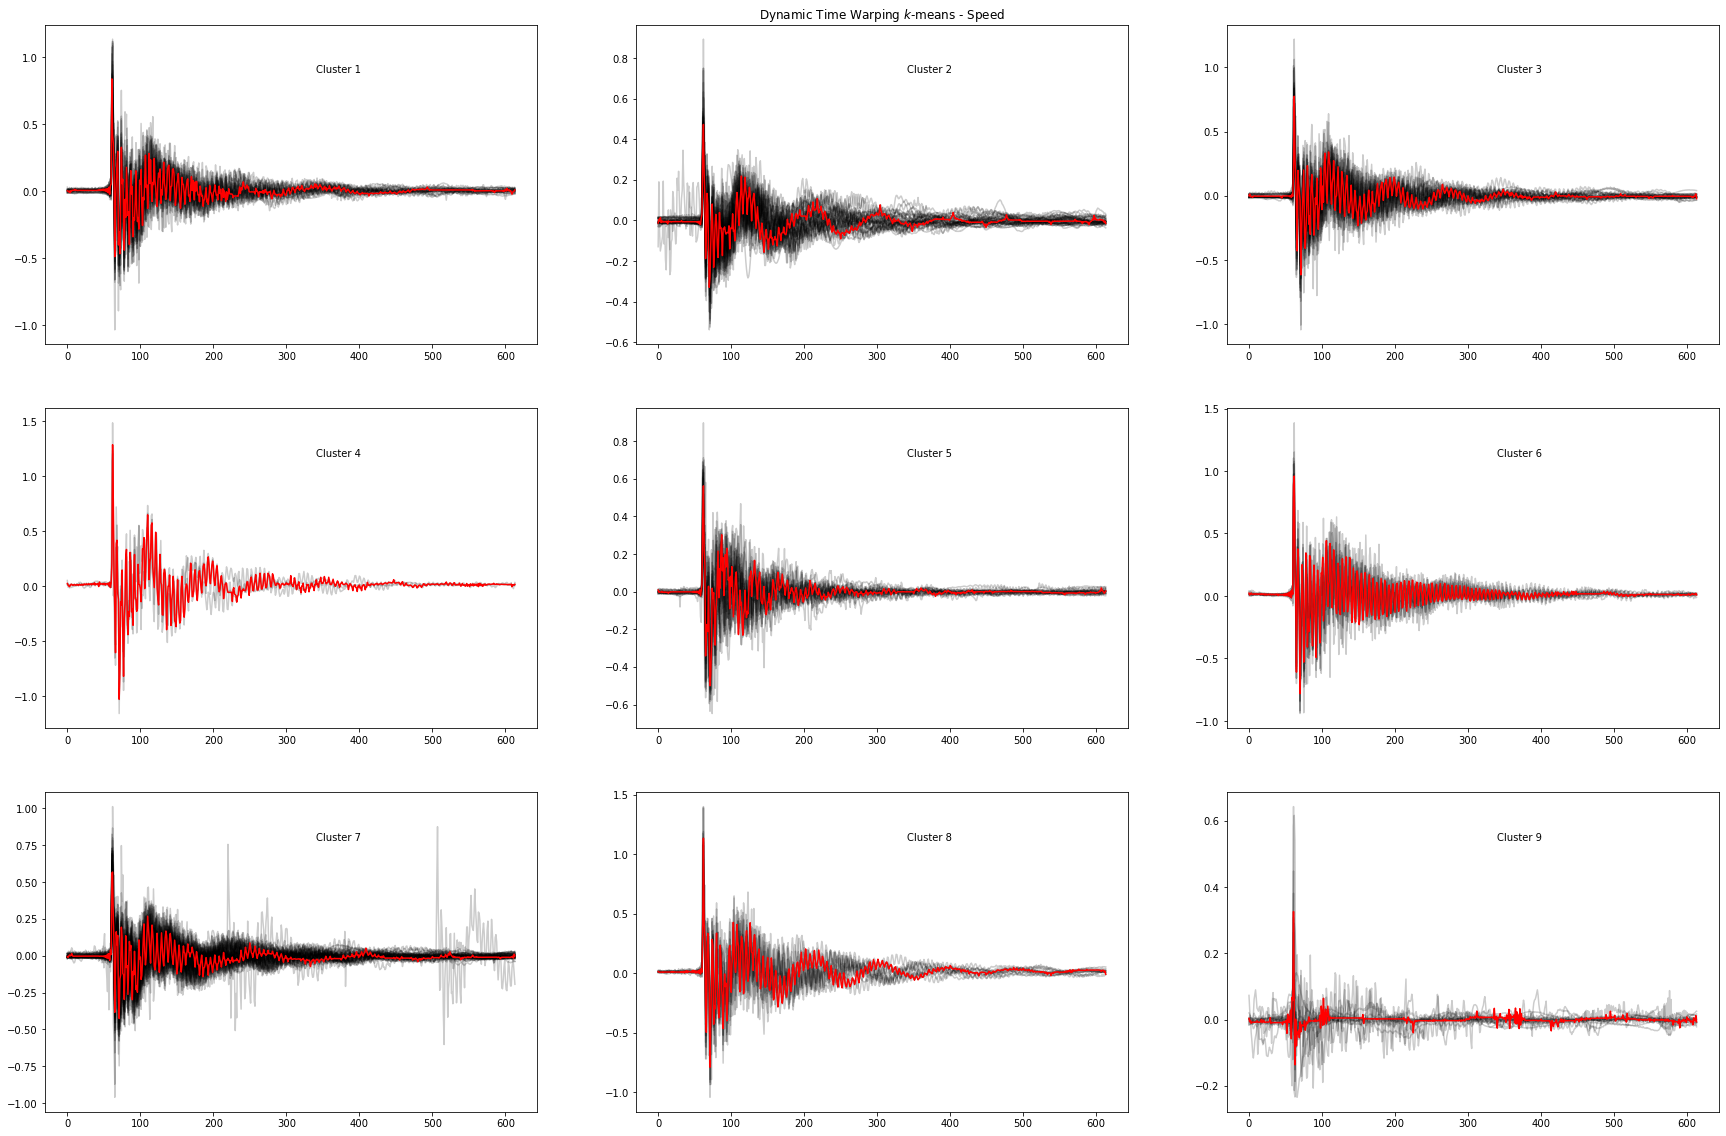

In [63]:
nb_clusters = 9
plt.figure(figsize=(30,20))
for yi in range(nb_clusters):
    plt.subplot(3, 3, yi + 1)
    for xx in Xtrain[cluster_labels_9_200 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_speed_9_200.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Dynamic Time Warping $k$-means - Speed")

/Users/sdonzis/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 5000 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


Inexplotable Data:  11.90 %


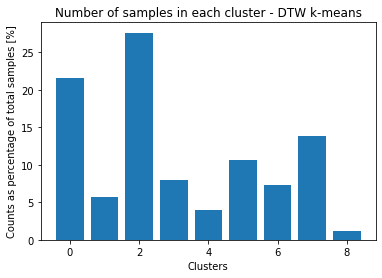

In [341]:
cluster_labels = model_speed_9_200.predict(np_vitesse[rnd_indices][:5000])
plot_cluster_counts(cluster_labels)
value_counts = np. unique((cluster_labels), return_counts=True)
print("Inexplotable Data: ", "{:.2f}".format(np.sum(np.array(value_counts[1]/np.sum(value_counts[1])*100)[[5,8]])), "%")

Based only on speed data DTW - 18 clusters

In [283]:
# based only on speed data DTW
Xtrain = np_vitesse[rnd_indices]
Xtrain = Xtrain[:200]
model_speed_18_200 = TimeSeriesKMeans(n_clusters=18, 
                                    metric="dtw", 
                                    max_iter=10)
cluster_labels_18_200 = model_speed_18_200.fit_predict(Xtrain)

In [71]:
cluster_labels_18_200_full_pred = model_speed_18_200.predict(np_vitesse[:2000])

/Users/sdonzis/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2000 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


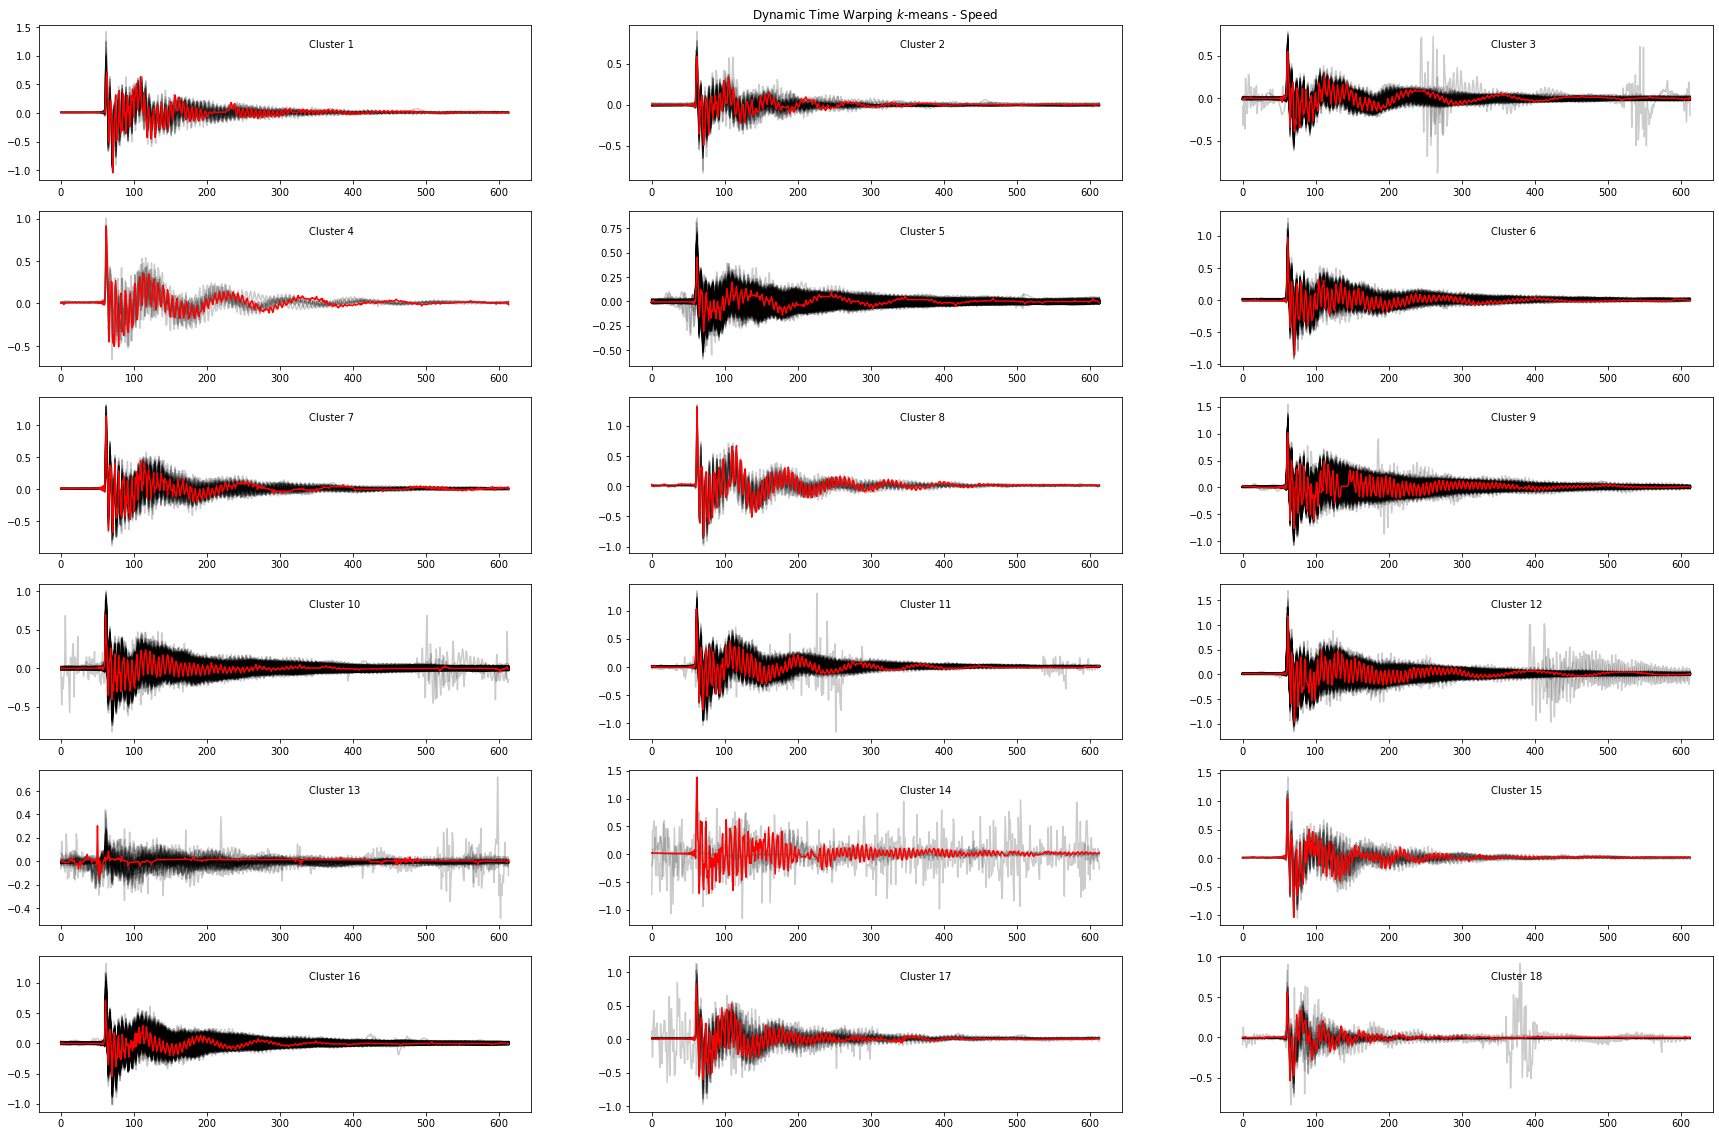

In [72]:
nb_clusters = 18
plt.figure(figsize=(30,20))
for yi in range(nb_clusters):
    plt.subplot(int(nb_clusters/3), 3, yi + 1)
    for xx in np_vitesse[:2000][cluster_labels_18_200_full_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_speed_18_200.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Dynamic Time Warping $k$-means - Speed")

Inexplotable Data:  2.05 %


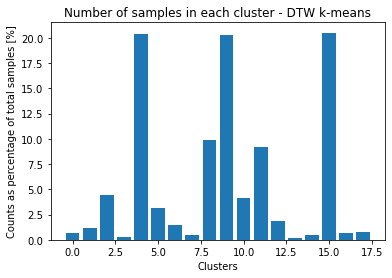

In [342]:
cluster_labels = model_speed_18_200.predict(np_vitesse[:5000])
plot_cluster_counts(cluster_labels)
value_counts = np. unique((cluster_labels), return_counts=True)
print("Inexplotable Data: ", "{:.2f}".format(np.sum(np.array(value_counts[1]/np.sum(value_counts[1])*100)[[12,13]])), "%")

In [114]:
print(np. unique((cluster_labels_18_200_full_pred == 13), return_counts=True))
print(np. unique(cluster_labels_18_200_full_pred, return_counts=True))

(array([False,  True]), array([1996,    4]))
(array([False,  True]), array([1990,   10]))


In [240]:
# same 18 clusters but only 200 data
nb_clusters = 18
plt.figure(figsize=(30,20))
for yi in range(nb_clusters):
    plt.subplot(6, 3, yi + 1)
    for xx in Xtrain[cluster_labels_18_200 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_speed_18_200.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Dynamic Time Warping $k$-means - Speed")

Error in callback <function flush_figures at 0x7f8f59bb4d30> (for post_execute):


KeyboardInterrupt: 

based only on speed data SoftDTW - 18 clusters

In [349]:
# based only on speed data SoftDTW
Xtrain = np_vitesse[rnd_indices]
Xtrain = Xtrain[:200]
nb_clusters = 3
model_speed_03 = TimeSeriesKMeans(n_clusters=18, 
                                metric="softdtw",
                                metric_params={"gamma": .01}, 
                                max_iter=10,
                                random_state=seed,
                                )
cluster_labels_03 = model_speed_03.fit_predict(Xtrain)
plt.figure(figsize=(30,20))
for yi in range(nb_clusters):
    plt.subplot(6, 3, yi + 1)
    for xx in Xtrain[cluster_labels_03 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_speed_03.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("SoftDTW $k$-means - Speed")
    plt.show
    

KeyboardInterrupt: 

# based only on frequency data DTW - 18 clusters

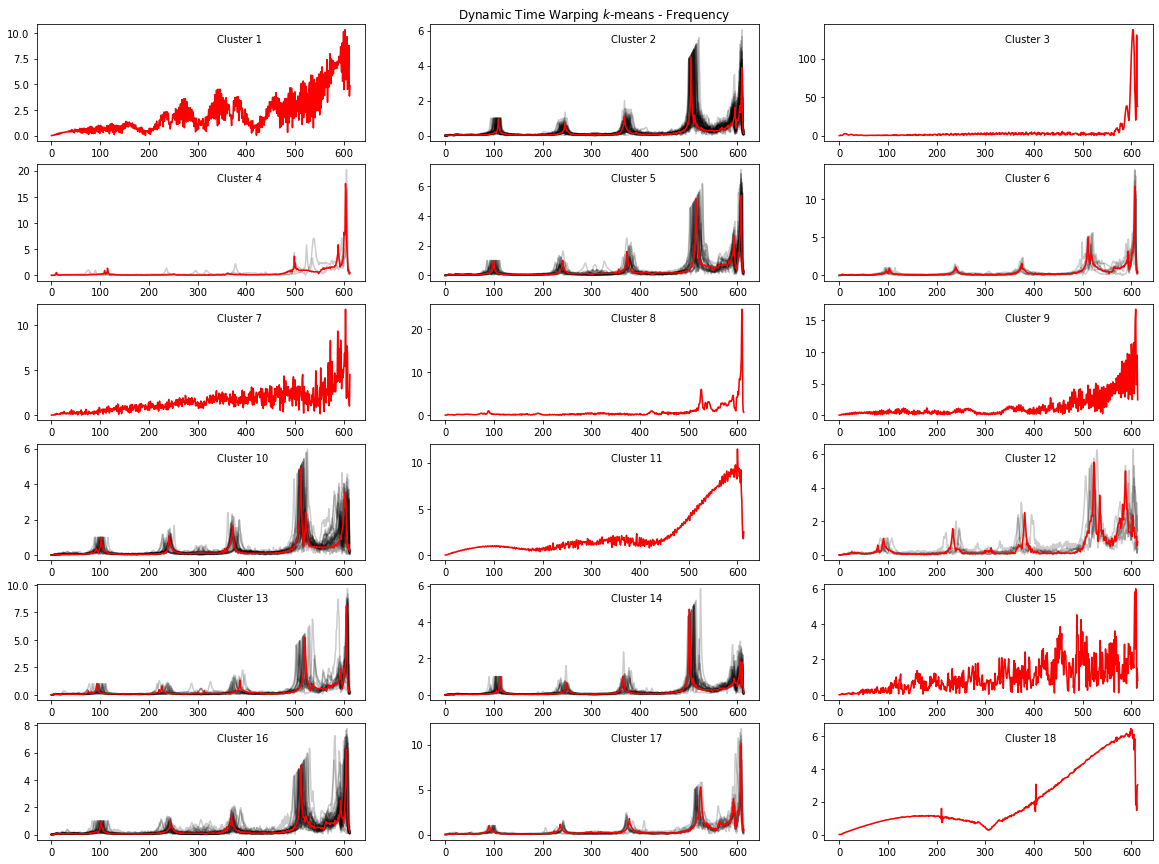

In [345]:
# based only on frequency data DTW
Xtrain = np_frf[rnd_indices]
Xtrain = Xtrain[:500]
model_speed_04 = TimeSeriesKMeans(n_clusters=18, 
                                  metric="dtw",
                                  max_iter=10,
                                  random_state=seed
                                 )
cluster_labels_04 = model_speed_04.fit_predict(Xtrain)

nb_clusters = 18
plt.figure(figsize=(20,15))
for yi in range(nb_clusters):
    plt.subplot(6, 3, yi + 1)
    for xx in Xtrain[cluster_labels_04 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_speed_04.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Dynamic Time Warping $k$-means - Frequency")

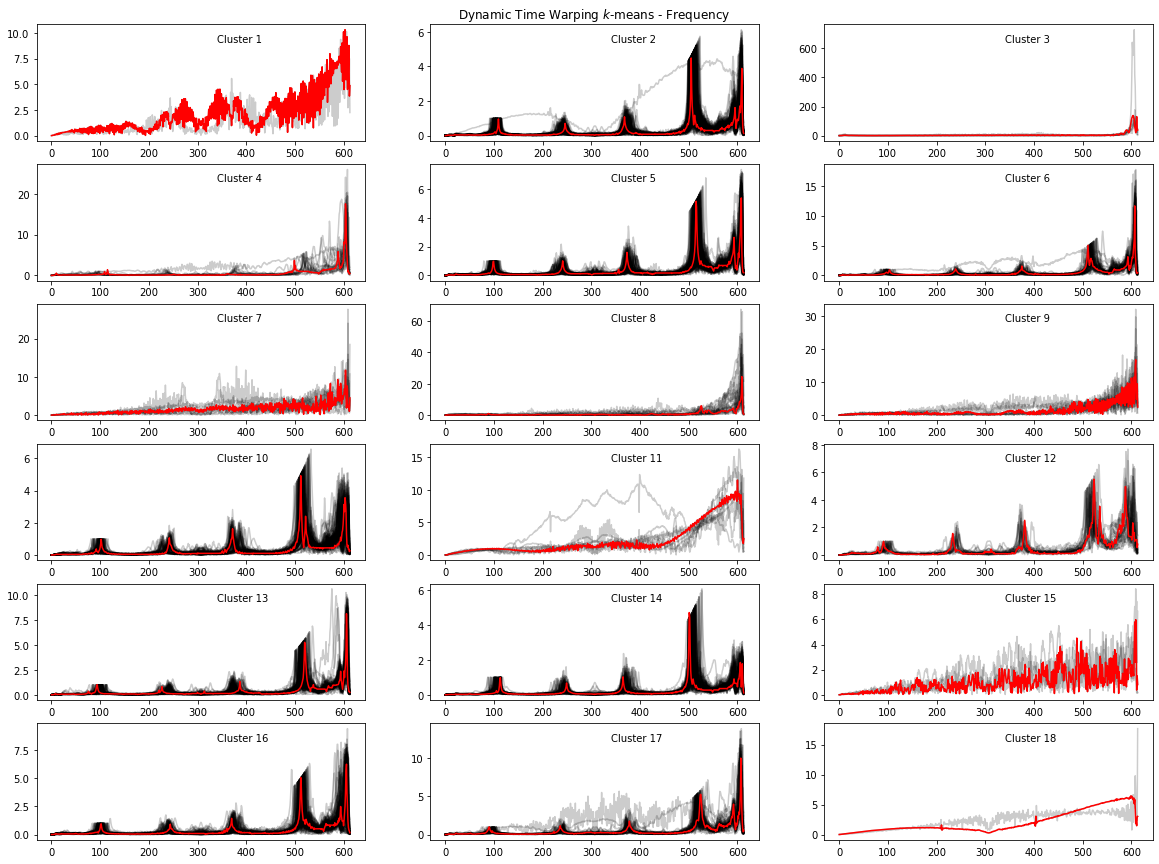

In [356]:
nb_clusters = 18
plt.figure(figsize=(20,15))
for yi in range(nb_clusters):
    plt.subplot(6, 3, yi + 1)
    for xx in np_frf[rnd_indices][:1000][cluster_labels == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_speed_04.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Dynamic Time Warping $k$-means - Frequency")

In [353]:
cluster_labels = model_speed_04.predict(np_frf[rnd_indices][:1000])

/Users/sdonzis/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1000 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


Inexplotable Data:  2.80 %


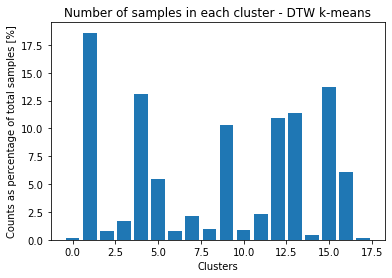

In [354]:
plot_cluster_counts(cluster_labels)
value_counts = np. unique((cluster_labels), return_counts=True)

In [357]:
print("Inexplotable Data: ", "{:.2f}".format(np.sum(np.array(value_counts[1]/np.sum(value_counts[1])*100)[[0,2,6,8,10,14,17]])), "%")

Inexplotable Data:  4.30 %


In [ ]:
print(np. unique(cluster_labels_18_200_full_pred, return_counts=True))

In [151]:
# based on speed and frequency data DTW
# multivariate features
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# Use the np_vitesse and np_frf data to create a time series dataset
X = to_time_series_dataset(np.append(np_vitesse, np_frf))

In [239]:
# based only on speed and frequency data DTW
# multivariate features
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# Use the np_vitesse and np_frf data to create a time series dataset
# X = to_time_series_dataset([np_vitesse, np_frf])
X_rnd = np_features[rnd_indices][:10000]

# Normalize the data
scaler = TimeSeriesScalerMeanVariance()
X_scaled = scaler.fit_transform(X_rnd)

# Create a TimeSeriesKMeans instance with 18 clusters
kmeans_2_features = TimeSeriesKMeans(n_clusters=18, random_state=seed)

# Fit the model to the data
cluster_labels_ = kmeans_2_features.fit_predict(X_scaled)

# Get the cluster centers
cluster_centers_2_features = kmeans_2_features.cluster_centers_
cluster_centers_2_features.shape

(18, 614, 2)

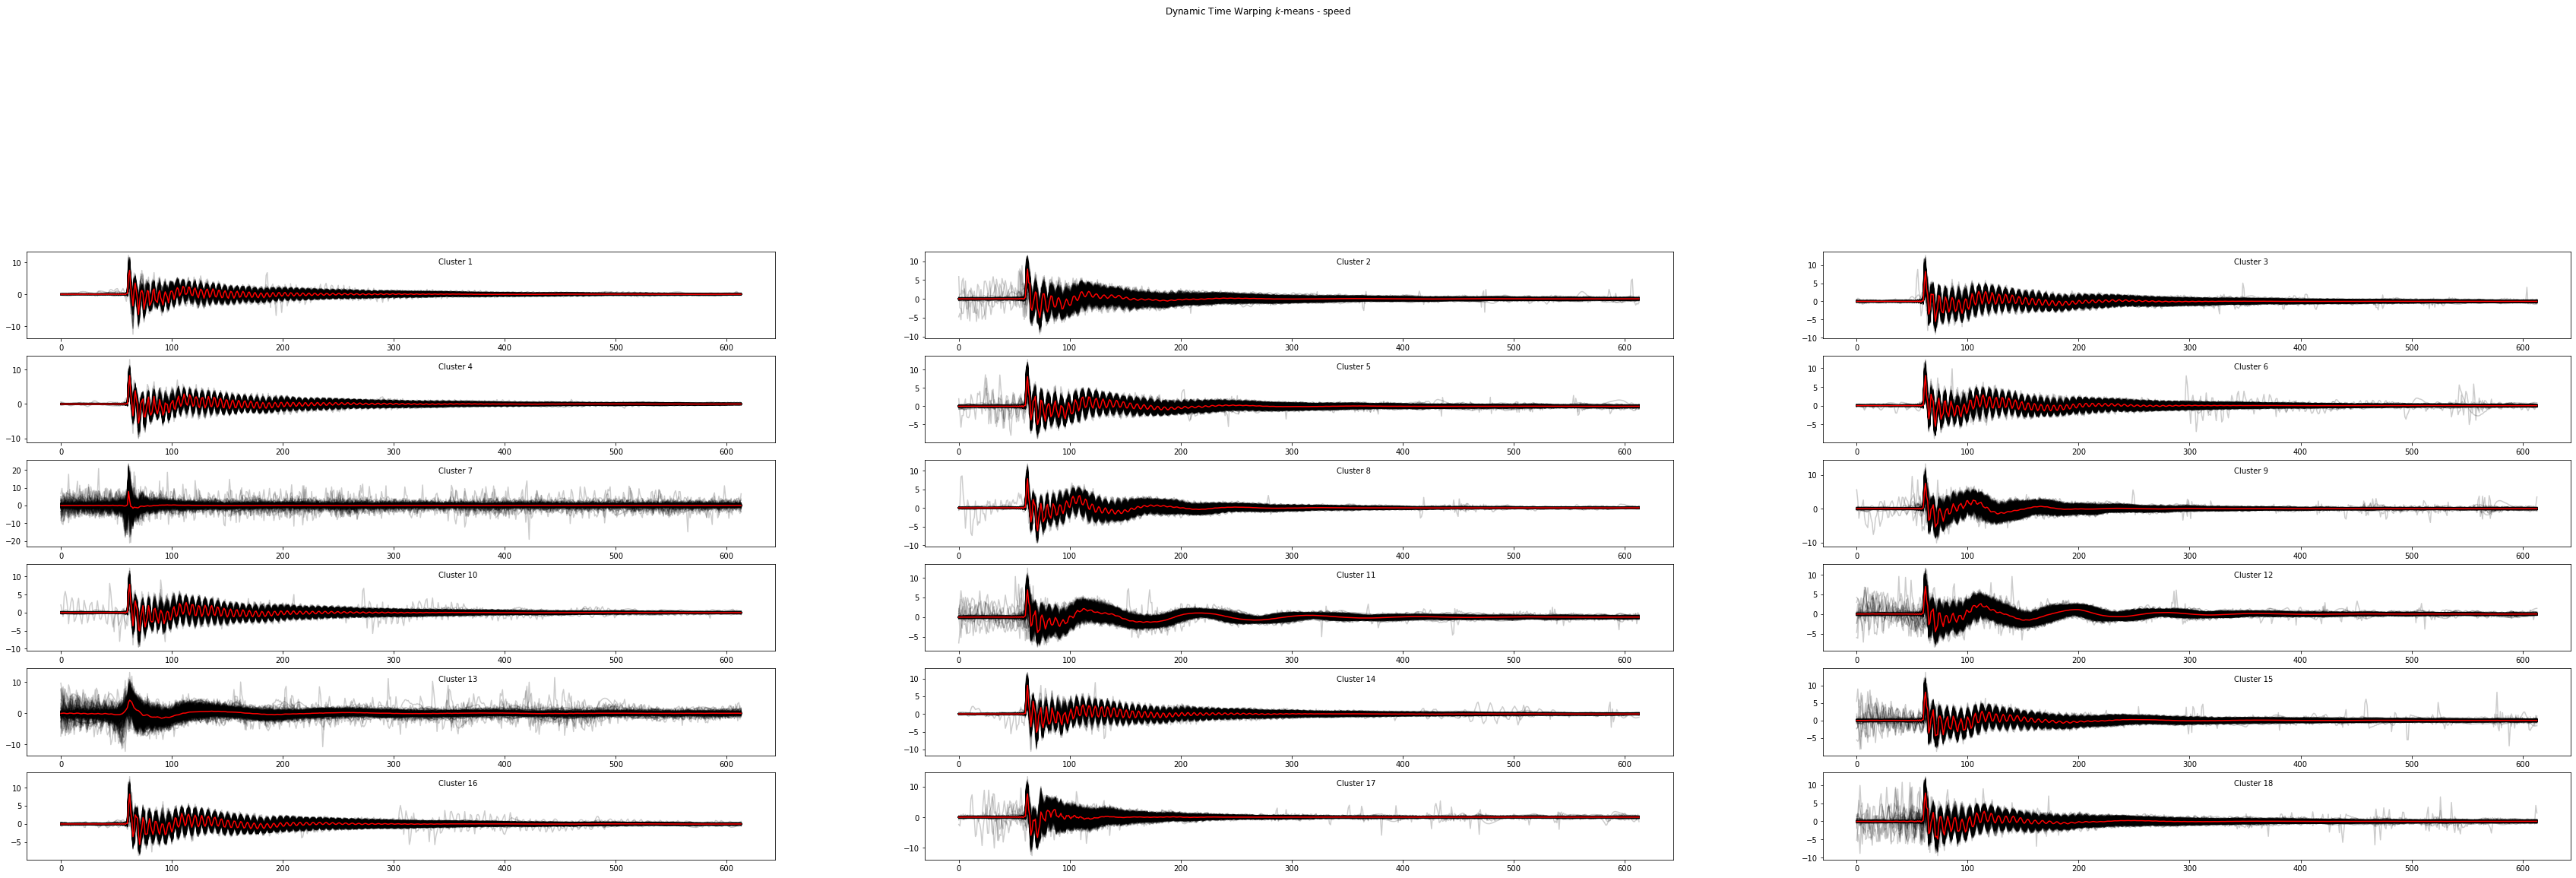

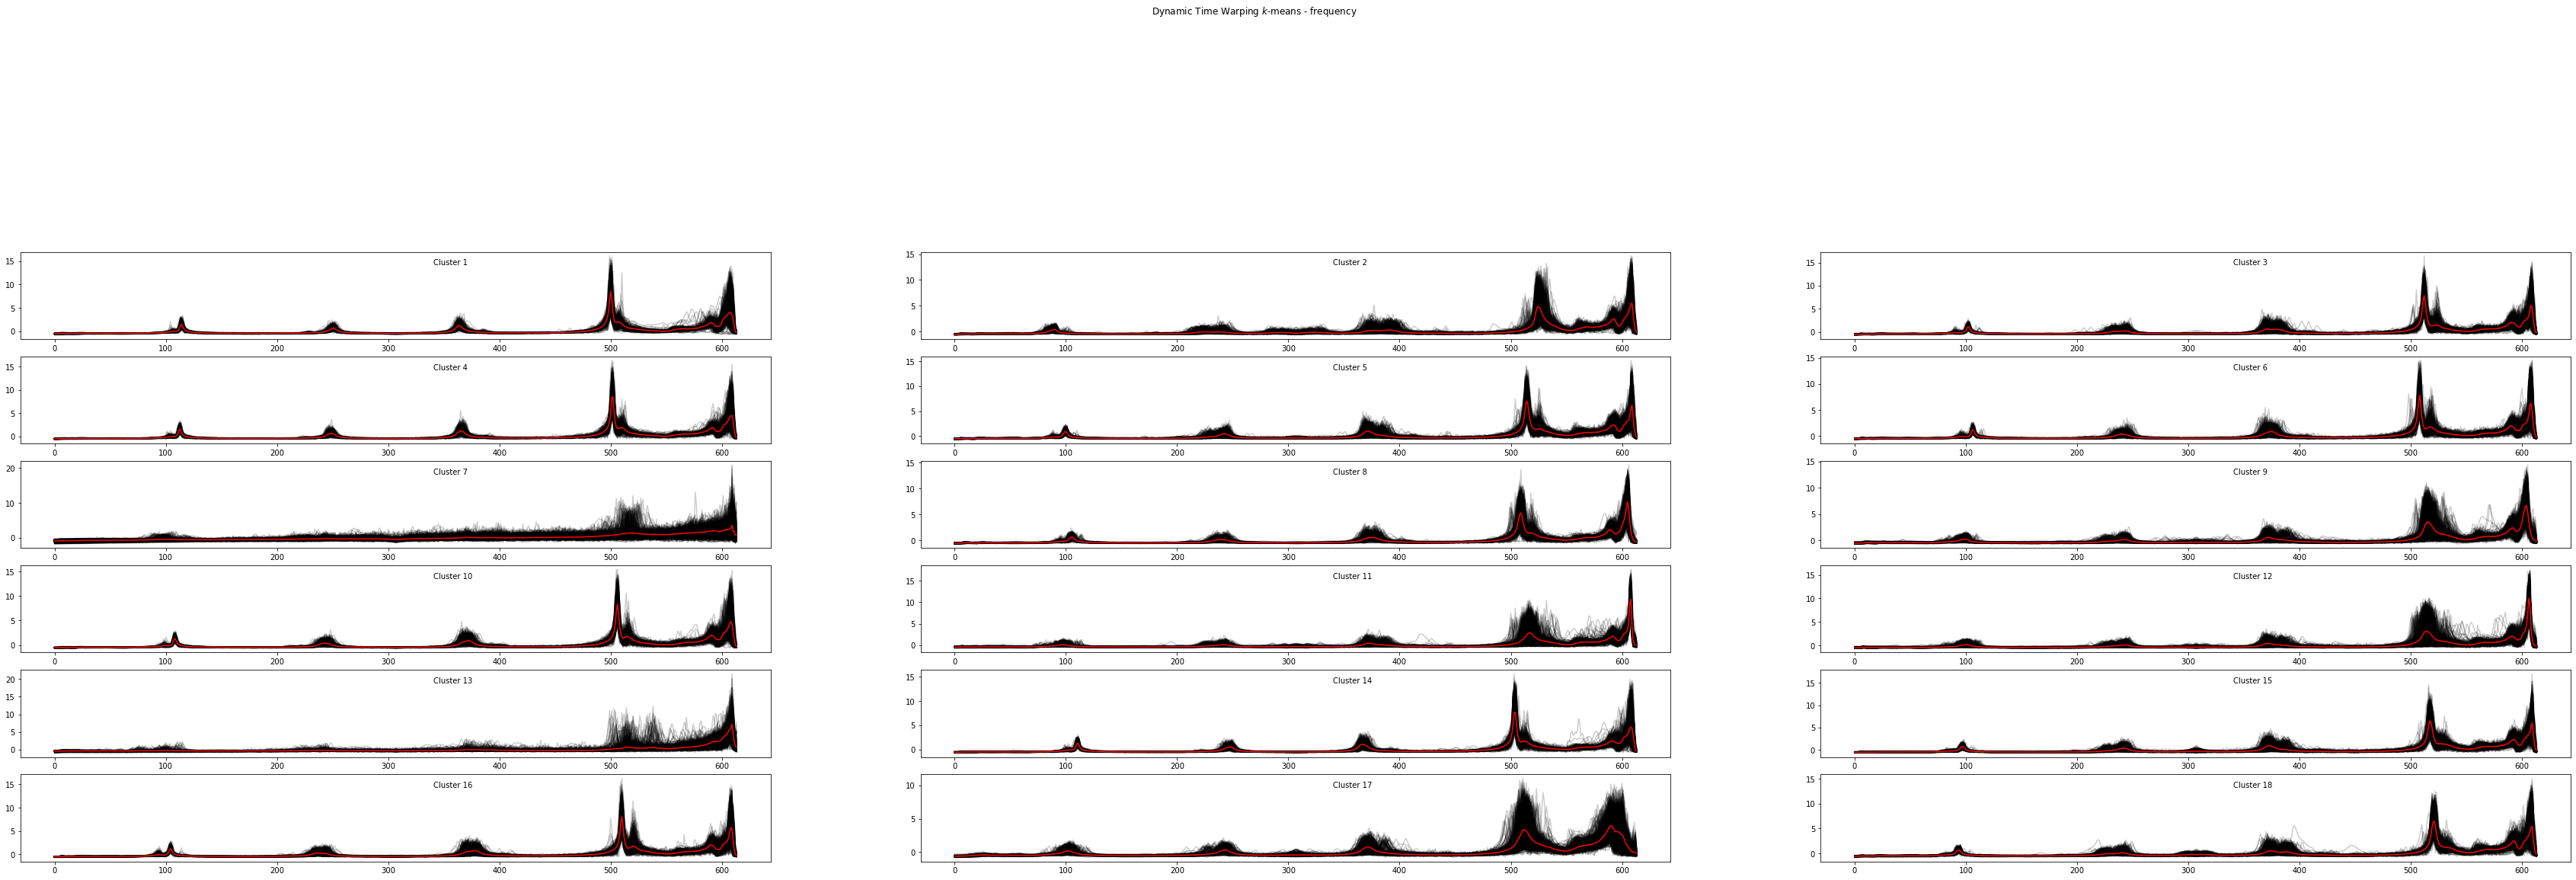

In [280]:
title_=["speed", "frequency"]
for i in range(2):
    plt.figure(figsize=(60,45))
    for yi in range(nb_clusters):
        plt.subplot(18, 3, yi + 1)
        for xx in X_scaled[cluster_labels_ == yi][:,:,i]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(cluster_centers_2_features[yi][:,i].ravel(), "r-")
        plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
                 transform=plt.gca().transAxes)
    plt.suptitle("Dynamic Time Warping $k$-means - " + title_[i])

Inexplotable Data:  15.00 %


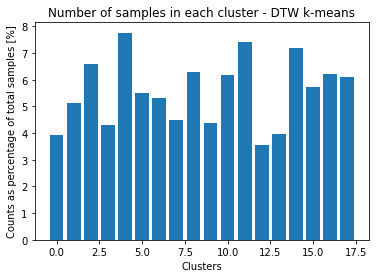

In [358]:
cluster_labels = cluster_labels_ #kmeans_2_features.predict(np_frf[rnd_indices][:5000])
plot_cluster_counts(cluster_labels)
value_counts = np. unique((cluster_labels), return_counts=True)
print("Inexplotable Data: ", "{:.2f}".format(np.sum(np.array(value_counts[1]/np.sum(value_counts[1])*100)[[6,12,17]])), "%")

In [454]:
np. unique((cluster_labels_), return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([394, 512, 658, 430, 776, 550, 532, 449, 627, 437, 617, 742, 357,
        395, 719, 572, 622, 611]))

In [437]:
# cluster_labels_.shape
df_cluster=pd.DataFrame(cluster_labels_, rnd_indices[:10000], columns=["cluster"]).sort_index()
df=df_data.iloc[rnd_indices[:10000]].sort_index()

In [438]:
df_ = df.join(df_cluster)
# df_.head()

In [439]:
np.delete(np.array(range(18)),[6,12,17])

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 13, 14, 15, 16])

In [450]:
for i in [6,12,17]:
    df_.loc[df_["cluster"]== i , "cluster"] = 0 #
# df_.loc[df_["cluster"]== 12, "cluster"] = int(0) #[6,12,17]
# df_.loc[df_["cluster"]== 17, "cluster"] = int(0) #[6,12,17]

for i in np.delete(np.array(range(18)),[6,12,17]):
    df_.loc[df_["cluster"]!= i, "cluster"] = 1 #[6,12,17]

In [451]:
(df_["cluster"]==1).value_counts()/100

True    100.0
Name: cluster, dtype: float64

In [442]:
(df_["Exploitable"]==df_.cluster).value_counts()/100

True     91.3
False     8.7
dtype: float64

In [443]:
df_.groupby(["cluster"])["cluster"].value_counts()

cluster  cluster
1.0      1.0        10000
Name: cluster, dtype: int64

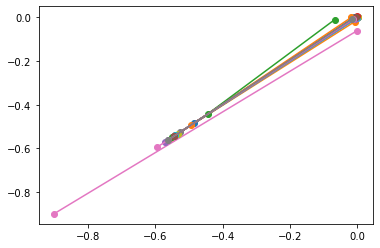

In [372]:
# Plot the cluster centers
import matplotlib.pyplot as plt
for cluster_center in cluster_centers_2_features:
    plt.plot(cluster_center[0], cluster_center[1], "o-")
plt.show()

In [ ]:
# Plot the cluster centers
import matplotlib.pyplot as plt
for cluster_center in cluster_centers_2_features:
    plt.plot(cluster_center[0], cluster_center[1], "o-")
plt.show()

In [98]:
print(kmeans_2_features.cluster_centers_.shape)
print(model_speed_18_200.cluster_centers_.shape)

(18, 200, 614)
(18, 614, 1)


In [132]:
cluster_center.shape

(200, 614)

In [116]:
from tslearn.datasets import CachedDatasets
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

In [ ]:
elbow_data = []
for n_clusters in [3,6,9,18,27,36,45,54,63,72,81,90,99]:
    
    X_train = np_vitesse[rnd_indices][:1000] # using only first 1.000 as a sample

    km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=False, random_state=42,n_jobs=-1)
    y_pred = km.fit_predict(X_train)
    elbow_data.append((n_clusters, km.inertia_))

pd.DataFrame(elbow_data,columns=['clusters', 'distance']).plot(x='clusters',y='distance')

In [127]:
print(X_train.shape)
print(y_train.shape)

(100, 275, 1)
(100,)


In [118]:
# tsfresh.feature_extraction.feature_calculators()

In [50]:
# np.save("np_data", np_data, allow_pickle=False)

In [ ]:
# data_array = np.array(undersample_data.T.drop('datetime').values)

# model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
# model.fit(data_array)
# cities_list = undersample_data.T.drop('datetime').index.tolist()